In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset.txt")

In [3]:
data.tail()

,Lương,Thời gian làm việc,Cho vay
15,4,1.00,0
16,5,0.50,0
17,6,0.30,0
18,7,0.20,0
19,8,0.15,0


2. Dùng thuật toán gradient descent, implement thuật toán logistic regeression

In [54]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
class LogisticRegression:
    
    def __init__(self, data, x_labels, y_labels):
        self.data = data
        n, d = data.shape
        self.x = data[x_labels].to_numpy().reshape(-1, len(x_labels))
        self.y = data[y_labels].to_numpy().reshape(-1, 1)
        self.x = np.hstack((np.ones((n, 1)), self.x))
        self.w = np.array([0.,0,0]).reshape(-1,1)
        self.x_labels = x_labels
        self.y_labels = y_labels

    def model_gd(self, number_of_iteration, alpha):
        for i in range(number_of_iteration):
            y_hat = sigmoid(np.dot(self.x, self.w))
            self.w = self.w - alpha * np.dot(self.x.transpose(), y_hat - self.y)
            loss = - np.sum(np.multiply(self.y, np.log(y_hat)) + np.multiply((1-self.y), np.log(1 - y_hat)))
        return self.w   
           
    def predict(self, x, t):
        x.insert(0, 1)
        return int(sigmoid(np.dot(x, self.w)) > t)

    def plot(self, t):
        fig, ax = plt.subplots(figsize = (10,4))
        accepted = self.data[self.data[self.y_labels] == 1]
        rejected = self.data[self.data[self.y_labels] == 0]
        plt.scatter(accepted[self.x_labels[0]], accepted[self.x_labels[1]], label = "accepted")
        plt.scatter(rejected[self.x_labels[0]], rejected[self.x_labels[1]], label = "rejected")
        x = [self.data[self.x_labels[0]].min(), self.data[self.x_labels[0]].max()]
        y = (-(self.w[0]+x[0]*self.w[1]+ np.log(1/t-1))/self.w[2], -(self.w[0] + x[1]*self.w[1]+ np.log(1/t-1))/self.w[2])
        plt.plot(x, y)
        plt.legend(loc=1)
        plt.xlabel("Lương")
        plt.ylabel("Thời gian làm việc")
    
    


3. Chạy toán toán logistic regression implement ở ý 2 cho dataset, https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv.

In [55]:
solution = LogisticRegression(data, ["Lương", "Thời gian làm việc"], "Cho vay")

In [56]:
solution.model_gd(1000, 0.01)

array([[-7.25194944],
       [ 0.62920922],
       [ 3.64209621]])

In [61]:
solution.predict(x = [4, 3], t = 0.5)

1

4. Vẽ đường boundary cho 2 class (có giải thích latex)

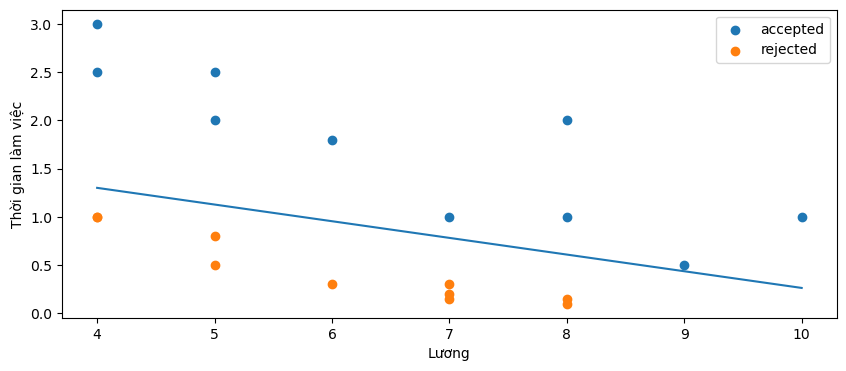

In [57]:
solution.plot(0.5)